<a href="https://colab.research.google.com/github/thumb-chuu/BigData-Internship_statistics/blob/main/%EC%97%84%EC%A7%80%EC%88%98_%EC%8B%A4%EC%8A%B5(2)%EC%9D%B4%EC%82%B0%26%EC%97%B0%EC%86%8D%ED%99%95%EB%A5%A0%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ◆ 이산확률분포 실습

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 67 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
# 패키지 임포트
import os
import warnings
# FutureWarning 제거
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd                 # pandas package
import numpy as np                  # numpy package
from scipy import stats             # Scipy Package

# 시각화 패키지
import matplotlib.pyplot as plt     # matplotlib 시각화 패키지
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :
    font_family = "NanumBarunGothic" # Windows OS 
else :
    font_family = "NanumBarunGothic" # MAC OS
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

# ◆ 이산확률분포 실습
### 2. 이산확률분포
### 1) 베르누이분포
### - 확률론과 통계학에서 매 시행마다 오직 두 가지의 가능한 결과만 일어난다고 할 때, 이러한 실험을 1회 시행하여 일어난 두 가지 결과에 의해 그 값이 각각 0과 1로 결정되는 확률분포
### stats.bernoulli() : 베르누이 확률 변수 클래스

In [ ]:
# 베르누이분포 정의
mu = 0.7
bern = stats.bernoulli(mu)

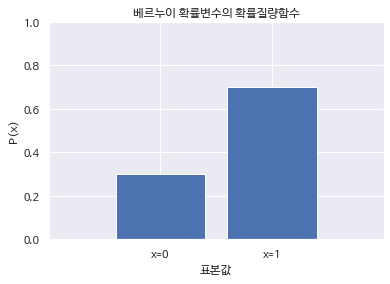

In [ ]:
## 확률질량함수 계산 및 시각화
b_x = [0, 1]
bern_pmf = bern.pmf(b_x)

# 시각화
plt.bar(b_x, bern_pmf)
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 확률질량함수")
plt.show()

In [ ]:
# 베르누이 검정을 위한 베르누이 샘플 100개 생성
x_sample_bern = bern.rvs(100, random_state=0)

In [ ]:
x_sample_bern

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [ ]:
# 베르누이 시뮬레이션
y_bern = np.bincount(x_sample_bern, minlength=2) / float(len(x_sample_bern))

df_bern = pd.DataFrame({"결과": bern_pmf, "검증(시뮬레이션)": y_bern})
df_bern.index = [0, 1]
df_bern

,결과,검증(시뮬레이션)
0,0.3,0.23
1,0.7,0.77


### 2. 이산확률분포
### 2) 이항분포
### - '성공'에 해당하는 사상이 출현할 확률이 p인 똑같은 베르누이시행을 독립적으로 n번 반복해서 시행하여 일어난 두 가지 결과에 의해 그 값이 각각 0과 1로 결정되는 확률분포
### stats.binom.pmf(성공횟수, n='실험 횟수', p='성공확률')

In [ ]:
## scipy 이항분포 확률질량함수 계산

# 0.3의 확률을 갖는 15회의 실험에서 3회 성공할 확률 반환
print("k=3, n=15, p=0.3의 PMF:", stats.binom.pmf(3, n=15, p=0.3))

# 0.3의 확률을 갖는 15회의 실험에서 0~4회 성공할 확률의 누적값 반환
print("k=0~4, n=15, p=0.3의 PMF:", stats.binom.cdf(4, n=15, p=0.3))

k=3, n=15, p=0.3의 PMF: 0.17004021326428578
k=0~4, n=15, p=0.3의 PMF: 0.5154910592268429


In [ ]:
# p의 확률을 갖는 n회의 시행에서 k회 성공할 (일어날) 확률을 반환하는 함수 생성
def bion_dist(k, n, p) :
    pmf_bion = stats.binom.pmf(k, n = n, p = p)
    return pmf_bion

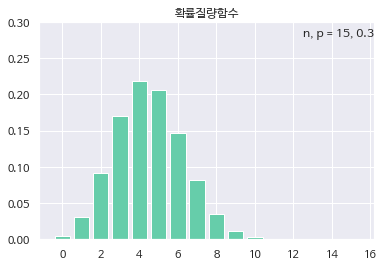

In [ ]:
# 0~15 범위 생성 : 성공 횟수
x = np.arange(0, 16)

# 확률질량함수의 값 array
pdf_result = [bion_dist(k, 15, 0.3) for k in range(0,16)]

# 시각화
plt.title("확률질량함수")
plt.ylim(0, 0.3)
plt.text(12.5, 0.28, 'n, p = 15, 0.3')
plt.bar(x, pdf_result, color='mediumaquamarine')
# plt.plot(x, pdf_result, color='lightcoral')
plt.show()

### 2. 이산확률분포
### 3) 포아송분포
### - 어떤 단위 시간 동안 발생한 사건 횟수를 x라 했을 때 확률분포
### - stats.poisson.pmf(n='시행수', lamb='평균 발생 수:기대값')
### - n회의 사건이 일어날 확률을 반환

In [ ]:
# scipy 포아송 함수
# 3번의 시행에서 평균 사건 수(기대값 2)에 대한 발생 확률
stats.poisson.pmf(3, 2, loc=0)

0.18044704431548356

In [ ]:
# n번의 시행에서 평균 사건 수(기대값, 람다)에 대한 발생 확률 함수
def pois_dist(n, lamb):
    pmf_poi = stats.poisson.pmf(n, lamb, loc=0)
    return pmf_poi

In [ ]:
# 확률질량함수의 값 array
x = np.arange(0, 41)
poi_pdf_result = [pois_dist(n, 10) for n in range(0, 41)]

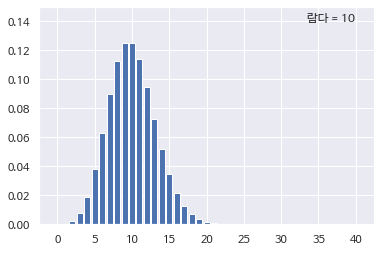

In [ ]:
plt.ylim(0, 0.15)
plt.text(33.5, 0.14, '람다 = 10')
plt.bar(x, poi_pdf_result)
plt.show()

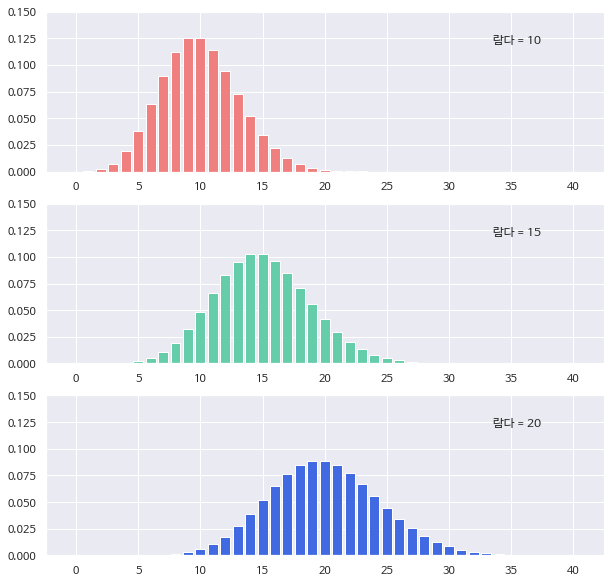

In [ ]:
## 기대값에 따른 포아송분포 차이 확인

x = np.arange(0, 41)

fig = plt.figure(figsize = (10,10))

fig.add_subplot(3, 1, 1)
pmf_poin1 = np.array([pois_dist(n, 10) for n in range(0, 41)])
plt.ylim(0, 0.15)
plt.text(33.5, 0.12, '람다 = 10')
plt.bar(x, pmf_poin1, color='lightcoral')

fig.add_subplot(3, 1, 2)
pmf_poin2 = np.array([pois_dist(n, 15) for n in range(0, 41)])
plt.ylim(0, 0.15)
plt.text(33.5, 0.12, '람다 = 15')
plt.bar(x, pmf_poin2, color='mediumaquamarine')

fig.add_subplot(3, 1, 3)
pmf_poin3 = np.array([pois_dist(n, 20) for n in range(0, 41)])
plt.ylim(0, 0.15)
plt.text(33.5, 0.12, '람다 = 20')
plt.bar(x, pmf_poin3, color='royalblue')

plt.show()

# ◆ 연속확률분포 실습
### Scipy 패키지
### - 사이파이(SciPy)는 수치 해석 기능을 제공하는 파이썬 패키지
### - 확률분포 분석을 위한 기능 제공

### 3. 연속확률분포
### 1) 정규분포
### - 평균을 중심으로 좌우대칭이고 종 모양을 갖는 확률분포(=가우스분포, Gaussian distribution)
### stats.norm(loc='기대값', scale='표준편차')

In [17]:
## 기대값이 70이고 표준편차가 10인 정규분포 생성
norm = stats.norm(loc=70, scale=10)

In [18]:
## 구간 내에 숫자를 균일한 간격으로 생성(X축)
# -10 ~ 150 까지 2000개 생성
s_x = np.linspace(-10, 150, 2000)

## 확률밀도함수
s_pdf = norm.pdf(s_x)

In [19]:
## 확률 밀도함수 계산
# mu = 70
# sigma = 10
# s_pdf_cal = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(s_x-mu)**2 / (2 * sigma**2))

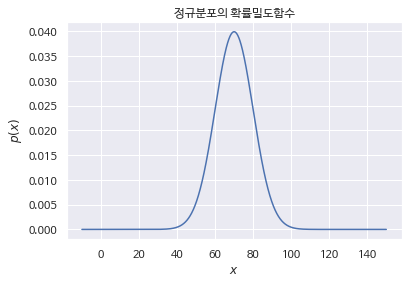

In [20]:
# 정규분포 시각화
plt.plot(s_x, s_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [21]:
## 누적분포함수
s_cdf = norm.cdf(s_x)

## 누적분포함수 계산
# from scipy.special import erf
# s_cdf_cal = 0.5 * (1 + erf((s_x-mu) / np.sqrt(2 * sigma**2)))

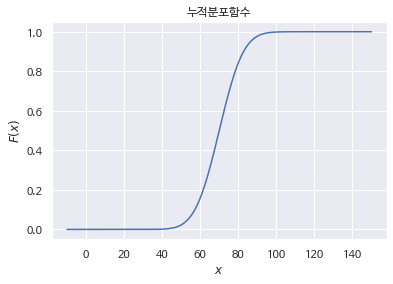

In [22]:
## 누적분포함수 시각화
plt.plot(s_x, s_cdf)
plt.title("누적분포함수")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()

### 2) 표준정규분포
### - 표준화 확률변수 Z에 의해 변환과정을 거쳐 평균이 0이고, 표준편차가 1로 정리된 정규분포
### stats.norm(loc=0, scale=1)

In [24]:
## 기대값이 0이고 표준편차가 11인 정규분포
stan_norm = stats.norm(loc=0, scale=1)
# 구간 내에 숫자를 균일한 간격으로 생성(X축)
# -10 ~ 150 까지 2000개 생성
sn_x = np.linspace(-5, 5, 1000)

# 확률밀도함수
sn_pdf = stan_norm.pdf(sn_x)

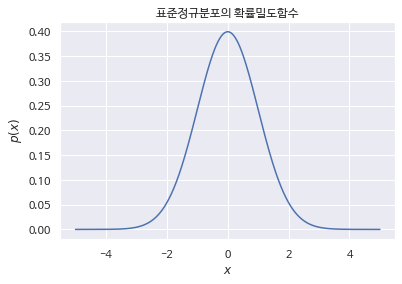

In [25]:
# 정규분포 시각화
plt.plot(sn_x, sn_pdf)
plt.title("표준정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

### 3) 표준화
### - 정규분포를 평균이 0이고, 표준편차가 1인 표준정규분포로 정리하는 과정
### stats.norm(loc=0, scale=1)

In [27]:
## 랜덤 데이터 생성
n_data = np.random.randint(1, 100, size = 1000)
n_data = np.sort(n_data)

In [28]:
n_data.shape

(1000,)

In [29]:
## n-data의 평균과 표준편차 계산
n_mean = np.mean(n_data)
print('mean:', np.mean(n_data))

n_std = np.std(n_data)
print('standard deviation:', np.std(n_data))

mean: 50.351
standard deviation: 28.81520083219966


In [30]:
## 확률밀도함수
norm_n_data = stats.norm(loc = n_mean, scale = n_std)

n_pdf = norm_n_data.pdf(n_data)

In [31]:
n_data.shape

(1000,)

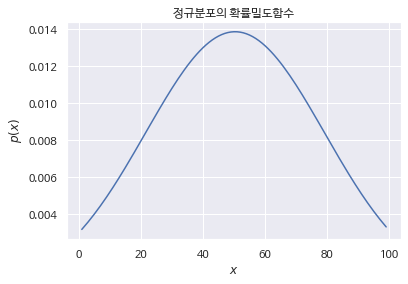

In [32]:
## 정규분포 시각화
plt.plot(n_data, n_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [33]:
## 표준화 수행
z_data = list(n_data)
z_data_list = []

for i in z_data:
    z = (i - n_mean) / n_std
    z_data_list.append(z)

In [34]:
## 표준정규분포 확률밀도함수
norm_z_data = stats.norm(loc = 0, scale = 1)
z_pdf = norm_z_data.pdf(z_data_list)

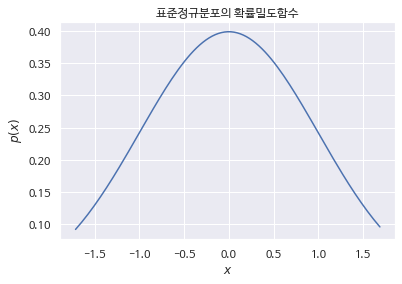

In [35]:
# 표준정규분포 시각화
plt.plot(z_data_list, z_pdf)
plt.title("표준정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

### 4) 카이제곱분포
### - 모든 데이터가 흩어진 정도, 즉 치우침을 나타내는 분산의 특징을 이용해 한 집단의 (표본)분산을 추론하는 분포
### - 범주형 변수인 명목척도나 서열척도 자료의 독립성 검정, 적합성 검정, 동질성 검정에 주로 활용
### chisquare() : 카이제곱 검정의 검정 통계량과 유의확률을 계산, 적합도 검정 / chi2() : 카이제곱분포

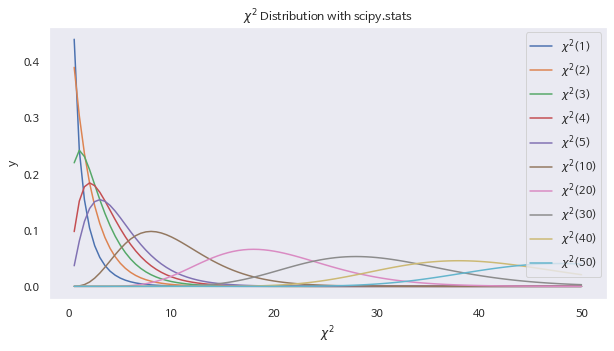

In [37]:
## 카이제곱분포 표현
from scipy.stats import chi2

## 라인스페이스 x축  설정
Chi_X = np.linspace(0.5, 50, 100)

# 자유도에 따른 카이제곱분포 시각화
plt.figure(figsize=(10, 5))                             # 플롯 사이즈 지정
for dof in [1,2,3,4,5,10,20,30,40,50] :
    plt.plot(Chi_X, stats.chi2(dof).pdf(Chi_X), label=r'$\chi^2$(' + str(dof) + ')')

plt.xlabel(r'$\chi^2$')                                 # x축 레이블 지정
plt.ylabel("y")                                         # y축 레이블 지정
plt.grid()                                              # 플롯에 격자 보이기
plt.title(r'$\chi^2$ Distribution with scipy.stats')
plt.legend()                                            # 범례 표시
plt.show()                                              # 플롯

In [38]:
### 카이제곱분포를 이용한 적합성 검정
## 한 개의 '판매지역' 명목 변수에 값 확인 결과 서울, 인천, 대구 지역에서 판매
## 교차분석표 생성(자유도 2)

# 관찰도수
x_o = [324, 78, 261]
# 기대도수
x_e = [371, 80, 212]

# 지역별 A제품의 판매수
x_crosstab = pd.DataFrame([x_o, x_e], columns = ['서울', '인천', '대구'], index = ['관찰도수', '기대도수'])

In [39]:
x_crosstab

,서울,인천,대구
관찰도수,324,78,261
기대도수,371,80,212


In [40]:
## 카이제곱 통계량 계산
from scipy.stats import chisquare

result = chisquare(x_o, f_exp = x_e)
result

# p-value가 0.0001725로 유의수준 0.05보다 작으므로 귀무가설을 기각하고, 대립가설을 지지한다.
# 즉, 관찰빈도와 기대빈도는 다르다.

Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

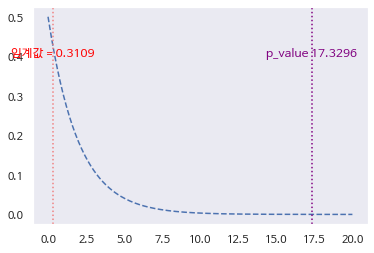

In [41]:
## 위 사례의 카이제곱분포 시각화
from scipy.stats import chi2

dof = 2
x_chi_l = np.linspace(0, 20, 201)
pdf_chi = chi2(dof).pdf(x_chi_l)

# 유의수준 : 5%
x95_c = chi2(dof).pdf(.95)
plt.plot(x_chi_l, pdf_chi, 'b--')

# 95%의 임계값 표시
plt.axvline(x=x95_c, color='lightcoral', linestyle=':')
plt.text(x95_c, .4, '임계값 = ' + str(round(x95_c, 4)), horizontalalignment='center', color='red')

# 위에서 구한 카이분포 통계값 = result[0]
plt.axvline(x=result[0], color='purple', linestyle=':')
plt.text(result[0], .4, 'p_value ' + str(round(result[0], 4)), horizontalalignment='center', color='purple')
plt.grid()
plt.show()